In [1]:



















import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [5]:
df = pd.read_csv('openb_pod_list_defaultv3.csv', sep="\t")

In [6]:
df.describe()

,cpu_milli,memory_mib,num_gpu,gpu_milli,gpu_spec,creation_time,deletion_time,scheduled_time
count,8152.000000,8152.000000,8152.000000,8152.000000,0.0,8.152000e+03,8.152000e+03,7.255000e+03
mean,10480.374387,37235.796246,0.911801,701.398430,NaN,1.154597e+07,1.157181e+07,1.152074e+07
std,8347.183493,33229.918711,0.639322,365.626444,NaN,9.536694e+05,8.898827e+05,9.597878e+05
min,1000.000000,0.000000,0.000000,0.000000,NaN,0.000000e+00,9.964972e+06,0.000000e+00
25%,4000.000000,15258.000000,1.000000,470.000000,NaN,1.073643e+07,1.075773e+07,1.071789e+07
50%,11300.000000,41560.000000,1.000000,810.000000,NaN,1.151654e+07,1.153702e+07,1.148943e+07
75%,12000.000000,49152.000000,1.000000,1000.000000,NaN,1.241082e+07,1.242584e+07,1.237608e+07
max,120200.000000,737280.000000,8.000000,1000.000000,NaN,1.290176e+07,1.290296e+07,1.290176e+07


In [7]:
df.head(30)

,name,cpu_milli,memory_mib,num_gpu,gpu_milli,gpu_spec,qos,pod_phase,creation_time,deletion_time,scheduled_time
0,openb-pod-0000,12000,16384,1,1000,NaN,LS,RUN_SUCC,0,12537496,0.0
1,openb-pod-0001,6000,12288,1,460,NaN,LS,RUN_SUCC,427061,12902960,427061.0
2,openb-pod-0002,12000,24576,1,1000,NaN,LS,RUN_SUCC,1558381,12902960,1558381.0
3,openb-pod-0003,6000,12288,1,460,NaN,LS,RUN_SUCC,2690044,12902960,2690044.0
4,openb-pod-0004,12000,16384,1,1000,NaN,LS,RUN_SUCC,2758084,12902960,2758084.0
5,openb-pod-0005,20000,65536,0,0,NaN,LS,RUN_SUCC,2759674,12902960,2759676.0
6,openb-pod-0006,4000,16384,1,1000,NaN,LS,RUN_SUCC,3019330,11815163,3019331.0
7,openb-pod-0007,12000,16384,1,1000,NaN,LS,RUN_SUCC,3019932,12902960,3019932.0
8,openb-pod-0008,12000,16384,1,1000,NaN,LS,RUN_SUCC,4130198,12902960,4130198.0
9,openb-pod-0009,12000,16384,1,1000,NaN,LS,RUN_SUCC,4975773,12902960,4975773.0


In [8]:
pod_phase = df['pod_phase']

for value in pod_phase.unique():
    print(value)

RUN_SUCC
FAIL_PEND


In [9]:
print(df.groupby('pod_phase').size())

pod_phase
FAIL_PEND    2767
RUN_SUCC     5385
dtype: int64


In [10]:
qos = df['qos']

for value in qos.unique():
    print(value)

print(df.groupby('qos').size())

LS
Burstable
BE
Guaranteed
qos
BE            3398
Burstable      100
Guaranteed       7
LS            4647
dtype: int64


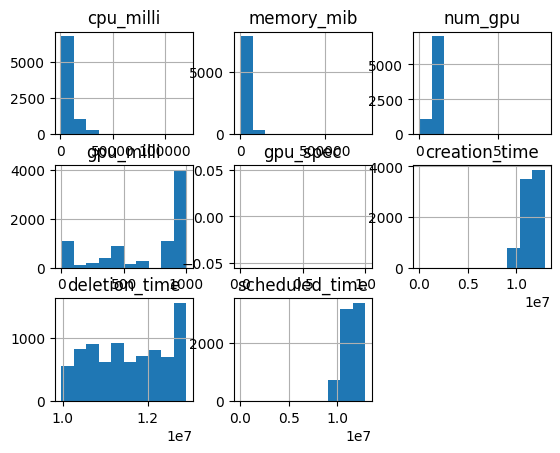

In [11]:
# histograms
df.hist()
plt.show()

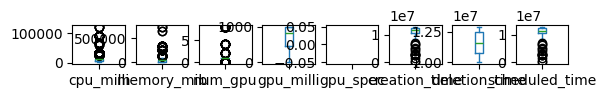

In [12]:
# box and whisker plots
df.plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False)
plt.show()

In [13]:
gpu_spec = df['gpu_spec']

for value in gpu_spec.unique():
    print(value)

nan


In [14]:
df.head(100)
#df2 = df.drop('deletion_time', axis=1) 


,name,cpu_milli,memory_mib,num_gpu,gpu_milli,gpu_spec,qos,pod_phase,creation_time,deletion_time,scheduled_time
0,openb-pod-0000,12000,16384,1,1000,NaN,LS,RUN_SUCC,0,12537496,0.0
1,openb-pod-0001,6000,12288,1,460,NaN,LS,RUN_SUCC,427061,12902960,427061.0
2,openb-pod-0002,12000,24576,1,1000,NaN,LS,RUN_SUCC,1558381,12902960,1558381.0
3,openb-pod-0003,6000,12288,1,460,NaN,LS,RUN_SUCC,2690044,12902960,2690044.0
4,openb-pod-0004,12000,16384,1,1000,NaN,LS,RUN_SUCC,2758084,12902960,2758084.0
...,...,...,...,...,...,...,...,...,...,...,...
95,openb-pod-0095,4152,10600,1,810,NaN,BE,FAIL_PEND,10019860,10024488,10019861.0
96,openb-pod-0096,18708,64512,1,1000,NaN,LS,FAIL_PEND,10019975,10020052,NaN
97,openb-pod-0097,8000,30517,1,320,NaN,BE,FAIL_PEND,10020010,10020025,NaN
98,openb-pod-0098,8000,30517,1,320,NaN,BE,RUN_SUCC,10020315,10020891,10020315.0


In [16]:
df3 = df.drop('gpu_spec', axis=1) 

In [18]:
data = df3[['cpu_milli', 'memory_mib', 'num_gpu', 'gpu_milli', 'creation_time','deletion_time', 'scheduled_time','pod_phase','qos' ]]
data = df3[['cpu_milli', 'memory_mib', 'num_gpu', 'gpu_milli', 'creation_time','qos','pod_phase']]
print(data.head(10))
null_count = data.isnull().sum().sum()
print('Number of null values:', null_count)
data['pod_phase'].replace(['RUN_SUCC', 'FAIL_PEND'],
                        [0, 1], inplace=True)

data['qos'].replace(['BE','LS','Burstable', 'Guaranteed'],
                        [0, 1, 2, 3], inplace=True)

   cpu_milli  memory_mib  num_gpu  gpu_milli  creation_time qos pod_phase
0      12000       16384        1       1000              0  LS  RUN_SUCC
1       6000       12288        1        460         427061  LS  RUN_SUCC
2      12000       24576        1       1000        1558381  LS  RUN_SUCC
3       6000       12288        1        460        2690044  LS  RUN_SUCC
4      12000       16384        1       1000        2758084  LS  RUN_SUCC
5      20000       65536        0          0        2759674  LS  RUN_SUCC
6       4000       16384        1       1000        3019330  LS  RUN_SUCC
7      12000       16384        1       1000        3019932  LS  RUN_SUCC
8      12000       16384        1       1000        4130198  LS  RUN_SUCC
9      12000       16384        1       1000        4975773  LS  RUN_SUCC
Number of null values: 0


/tmp/ipykernel_16416/4165013827.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['pod_phase'].replace(['RUN_SUCC', 'FAIL_PEND'],
/tmp/ipykernel_16416/4165013827.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['pod_phase'].replace(['RUN_SUCC', 'FAIL_PEND'],
/tmp/ipykernel_16416/41650

   cpu_milli  memory_mib  num_gpu  gpu_milli  creation_time  qos  pod_phase
0      12000       16384        1       1000              0    1          0
1       6000       12288        1        460         427061    1          0
2      12000       24576        1       1000        1558381    1          0
3       6000       12288        1        460        2690044    1          0
4      12000       16384        1       1000        2758084    1          0
5      20000       65536        0          0        2759674    1          0
6       4000       16384        1       1000        3019330    1          0
7      12000       16384        1       1000        3019932    1          0
8      12000       16384        1       1000        4130198    1          0
9      12000       16384        1       1000        4975773    1          0
{('cpu_milli', 'memory_mib'): '0.84', ('cpu_milli', 'num_gpu'): '0.35', ('cpu_milli', 'gpu_milli'): '-0.10', ('cpu_milli', 'creation_time'): '0.06', ('cpu_milli', '

/tmp/ipykernel_16416/1643327632.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


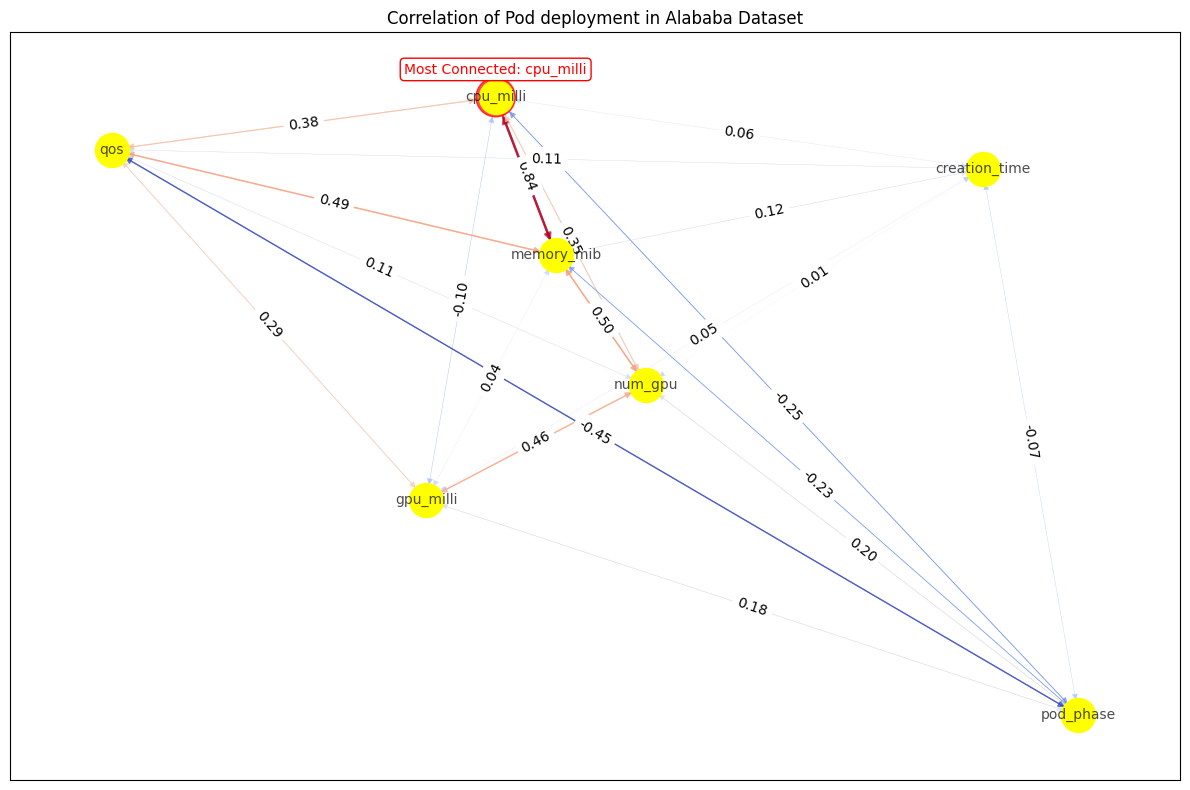

In [19]:
import networkx as nx
import matplotlib.pyplot as plt









print(data.head(10))
data.dropna(inplace=True)

G = nx.DiGraph()

G.add_nodes_from(data.columns)

for col1 in data.columns:
    for col2 in data.columns:
        if col1 != col2:
            correlation = data[col1].corr(data[col2], 'pearson')
            G.add_edge(col1, col2, weight=correlation)
most_connected_node = max(G, key=G.degree)

pos = nx.spring_layout(G, k=0.9, seed=42)

node_colors = ['lightblue' if col != most_connected_node else 'red' for col in G.nodes]
node_sizes = [500 if col != most_connected_node else 800 for col in G.nodes]

edge_colors = [d['weight'] for _, _, d in G.edges(data=True)]
edge_widths = [2 * abs(weight) for weight in edge_colors]

plt.figure(figsize=(12, 8))
nx.draw_networkx(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes,
                 edge_color=edge_colors, width=edge_widths, edge_cmap=plt.cm.coolwarm,
                 alpha=0.7, font_size=10, arrows=True)

plt.annotate(f'Most Connected: {most_connected_node}', xy=pos[most_connected_node], xytext=(0, 20),
             textcoords='offset points', ha='center', va='center', color='red',
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='red', facecolor='white'))

clusters = [cluster for cluster in nx.weakly_connected_components(G) if len(cluster) > 1]
for cluster in clusters:
    cluster_nodes = list(cluster)
    nx.draw_networkx_nodes(G, pos, nodelist=cluster_nodes, node_color='yellow', node_size=600)

edge_labels = {(i, j): f"{G[i][j]['weight']:.2f}" for i, j in G.edges()}
print (edge_labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black')

sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm)
sm.set_array(edge_colors)
#plt.colorbar(sm)

plt.title('Correlation of Pod deployment in Alababa Dataset')
plt.tight_layout()
plt.show()

In [20]:
# Split-out validation dataset
array = data.values
X = array[:,0:6]
y = array[:,6]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)
print (y)

[0 0 0 ... 0 1 1]


In [21]:
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable


<Axes: >

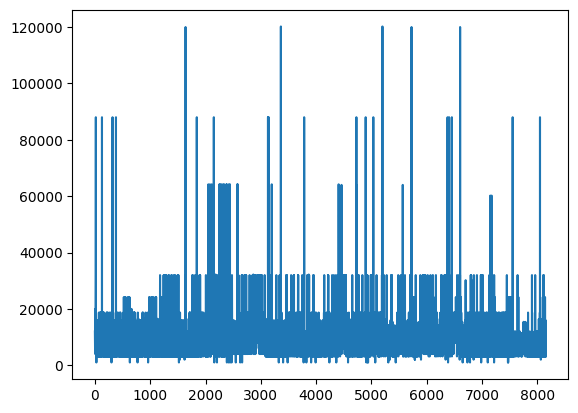

In [22]:
df['cpu_milli'].plot()

<Axes: >

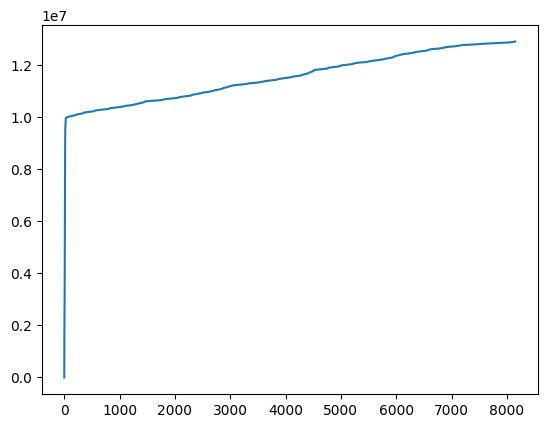

In [23]:
df['creation_time'].plot()

<Axes: >

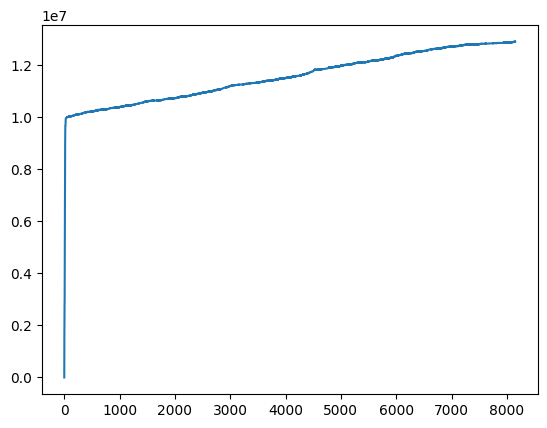

In [24]:
df['scheduled_time'].plot()

<Axes: >

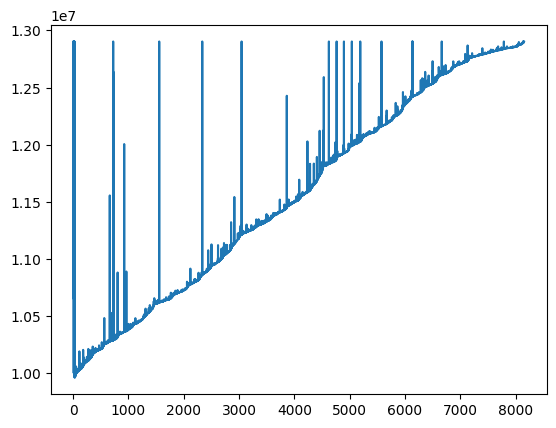

In [25]:
df['deletion_time'].plot()

<Axes: xlabel='creation_time', ylabel='cpu_milli'>

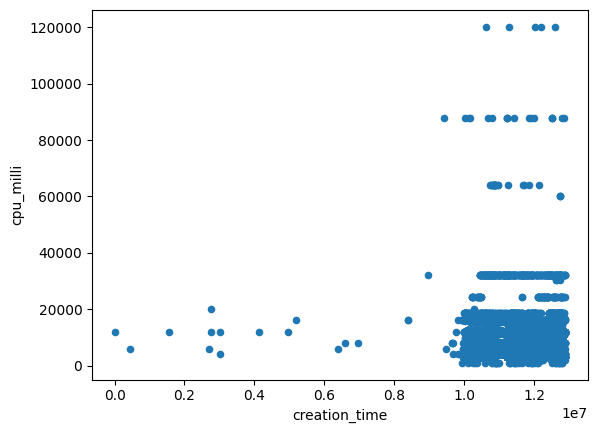

In [26]:
df.plot.scatter(x='creation_time', y='cpu_milli')

In [27]:
data.head()

,cpu_milli,memory_mib,num_gpu,gpu_milli,creation_time,qos,pod_phase
0,12000,16384,1,1000,0,1,0
1,6000,12288,1,460,427061,1,0
2,12000,24576,1,1000,1558381,1,0
3,6000,12288,1,460,2690044,1,0
4,12000,16384,1,1000,2758084,1,0


In [28]:
import seaborn as sns
import sklearn
import warnings
 
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score




In [29]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
#models.append(('LDA', +()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.849407 (0.010825)
KNN: 0.842812 (0.012481)
CART: 0.862749 (0.015034)
NB: 0.864129 (0.012082)
SVM: 0.665849 (0.002034)


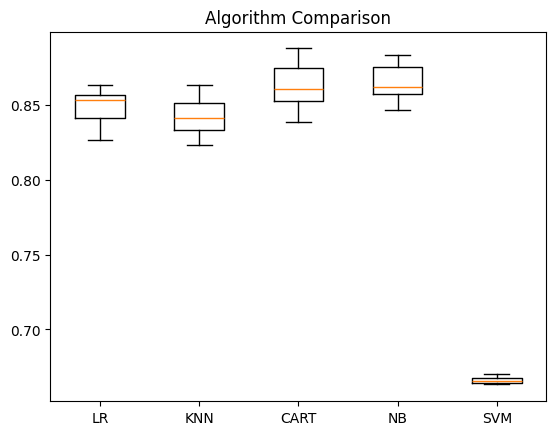

In [30]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [31]:
...
# Make predictions on validation dataset
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8375229920294298
[[1025   45]
 [ 220  341]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      1070
           1       0.88      0.61      0.72       561

    accuracy                           0.84      1631
   macro avg       0.85      0.78      0.80      1631
weighted avg       0.84      0.84      0.83      1631

